<a href="https://colab.research.google.com/github/AzamChatrAzar/project1/blob/main/Graph3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

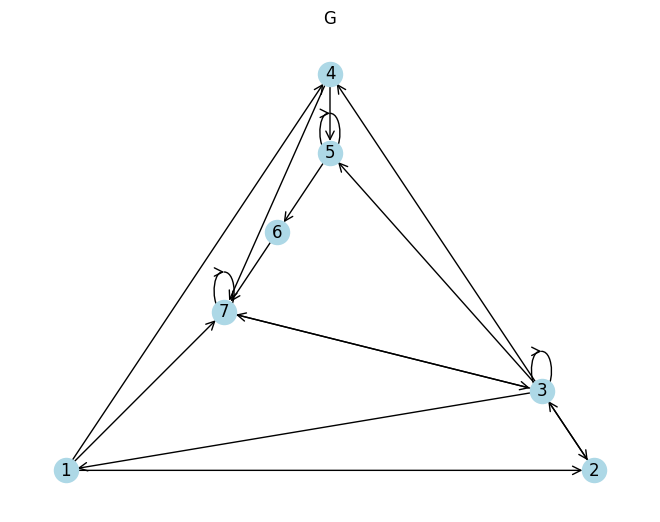

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# ایجاد گراف جهت‌دار
G = nx.DiGraph()

# رئوس
vertices = [1, 2, 3, 4, 5, 6,7]
G.add_nodes_from(vertices)

# یال‌ها
edges = [
    (1, 2), (2, 3), (3, 1),(3,2),(3,5),(1,7),(7,7),(7,3),(3,7),(4,7),(6,7),
    (1, 4), (4, 5), (5, 6),(5,5),(3,3),
    (3, 4)
]
G.add_edges_from(edges)

# رسم گراف
pos = nx.planar_layout(G)  # چینش مسطح
nx.draw(G, pos, with_labels=True, node_color='lightblue',
        arrows=True, arrowstyle='->', arrowsize=15)
plt.title("G")
plt.show()

ماتریس مجاورت گراف


In [2]:
import numpy as np


adj_matrix = np.zeros((7, 7), dtype=int)

# پر کردن ماتریس بر اساس یال‌ها
for (u, v) in edges:
    adj_matrix[u-1][v-1] = 1

# نمایش ماتریس
print("ماتریس مجاورت گراف:")
print(adj_matrix)

ماتریس مجاورت گراف:
[[0 1 0 1 0 0 1]
 [0 0 1 0 0 0 0]
 [1 1 1 1 1 0 1]
 [0 0 0 0 1 0 1]
 [0 0 0 0 1 1 0]
 [0 0 0 0 0 0 1]
 [0 0 1 0 0 0 1]]


# ماتریس انتقال (P)



In [4]:

# محاسبه درجه خروجی هر راس
out_degree = {v: 0 for v in vertices}
for (u, v) in edges:
    out_degree[u] += 1

# ایجاد ماتریس انتقال (۶x۶)
P = np.zeros((7, 7))

# پر کردن ماتریس انتقال
for (u, v) in edges:
    P[u-1][v-1] = 1 / out_degree[u]  # چون پایتون ایندکس از ۰ شروع می‌شود

# نمایش ماتریس انتقال
print("ماتریس انتقال (P):")
print(P)

ماتریس انتقال (P):
[[0.         0.33333333 0.         0.33333333 0.         0.
  0.33333333]
 [0.         0.         1.         0.         0.         0.
  0.        ]
 [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.
  0.16666667]
 [0.         0.         0.         0.         0.5        0.
  0.5       ]
 [0.         0.         0.         0.         0.5        0.5
  0.        ]
 [0.         0.         0.         0.         0.         0.
  1.        ]
 [0.         0.         0.5        0.         0.         0.
  0.5       ]]


#ماتریس انتقال پیج رنک

In [5]:
import numpy as np


alpha = 0.85
n = 7


# ماتریس اتصال یکنواخت (Teleportation)
teleport = np.ones((n, n)) / n

# محاسبه ماتریس Pα
P_alpha = alpha * P + (1 - alpha) * teleport

# نمایش ماتریس Pα
print(f"ماتریس انتقال پیج رنک (P_alpha) با آلفا = {alpha}:")
print(np.round(P_alpha, 4))

ماتریس انتقال پیج رنک (P_alpha) با آلفا = 0.85:
[[0.0214 0.3048 0.0214 0.3048 0.0214 0.0214 0.3048]
 [0.0214 0.0214 0.8714 0.0214 0.0214 0.0214 0.0214]
 [0.1631 0.1631 0.1631 0.1631 0.1631 0.0214 0.1631]
 [0.0214 0.0214 0.0214 0.0214 0.4464 0.0214 0.4464]
 [0.0214 0.0214 0.0214 0.0214 0.4464 0.4464 0.0214]
 [0.0214 0.0214 0.0214 0.0214 0.0214 0.0214 0.8714]
 [0.0214 0.0214 0.4464 0.0214 0.0214 0.0214 0.4464]]



# محاسبه مقادیر ویژه و بردارهای ویژه

In [7]:

from numpy.linalg import eig, matrix_rank

# 2. محاسبه مقدار ویژه ماکس و بردار ویژه برای P_alpha
eigenvalues, eigenvectors = eig(P_alpha)
max_idx = np.argmax(np.abs(eigenvalues))
lambda_max = eigenvalues[max_idx]
v_max = eigenvectors[:, max_idx].reshape(-1, 1)

print(f"مقدار ویژه ماکس P_alpha: {lambda_max:.4f}")
print(f"بردار ویژه متناظر:\n{v_max}\n")


مقدار ویژه ماکس P_alpha: 0.7591+0.0000j
بردار ویژه متناظر:
[[0.53850304+0.j]
 [0.62130998+0.j]
 [0.49304857+0.j]
 [0.2335746 +0.j]
 [0.14676638+0.j]
 [0.06923892+0.j]]



#BinaryPolynomial

In [8]:
# 3. تولید 50 چندجمله‌ای تصادفی غیرثابت
def generate_polynomials(num_polys=50, degree=6):
    polynomials = []
    while len(polynomials) < num_polys:
        coeffs = np.random.randint(0, 2, size=degree+1)
        if np.any(coeffs[1:]):  # حداقل یک ضریب غیرثابت
            polynomials.append(coeffs)
    return polynomials

polynomials = generate_polynomials(50)

# 4. تحلیل استقلال خطی بردارهای ویژه

In [9]:
# 4. تحلیل استقلال خطی بردارهای ویژه
independent_polys = []

for i, coeffs in enumerate(polynomials):
    # محاسبه h(P_alpha)
    hP = sum(c * np.linalg.matrix_power(P_alpha, p)
             for p, c in enumerate(coeffs) if c != 0)

    # محاسبه مقادیر ویژه و بردارهای ویژه
    h_eigenvalues, h_eigenvectors = eig(hP)
    h_max_idx = np.argmax(np.abs(h_eigenvalues))
    h_lambda_max = h_eigenvalues[h_max_idx]
    h_v_max = h_eigenvectors[:, h_max_idx].reshape(-1, 1)

    # بررسی استقلال خطی
    matrix_for_rank = np.hstack([v_max, h_v_max])
    if matrix_rank(matrix_for_rank) == 2:
        independent_polys.append({
            'polynomial': coeffs,
            'lambda_max': h_lambda_max,
            'eigenvector': h_v_max
        })

In [10]:
# 5. نمایش نتایج
print(f"از {len(polynomials)} چندجمله‌ای، {len(independent_polys)} مورد بردار ویژه مستقل تولید کردند:")
for i, item in enumerate(independent_polys[:5]):  # نمایش 5 مورد اول
    print(f"\nچندجمله‌ای {i+1}: {item['polynomial']}")
    print(f"مقدار ویژه ماکس: {item['lambda_max']:.4f}")
    print(f"بردار ویژه:\n{item['eigenvector']}")

از 50 چندجمله‌ای، 0 مورد بردار ویژه مستقل تولید کردند:
